In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Desafío Final: 
# Fichero restaurants_only.csv
Víctor González 100363949 - Ángel Luis Alonso 100363923 - Marcos Arroyo 100363919

# Primer paso

## Preparado de datos, carga de datos y organización-limpieza
Después de haber modificado el archivo **datos_negocios.csv** proporcionado (según explicamos en el documento **preparado_de_datos.ipynb**), nos disponemos a analizar el mismo:

In [0]:
#Realizamos todos los imports en esta sección y definiciones

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from datetime import datetime, date, time, timedelta

    

Leemos el conjunto de datos tratados:

In [0]:
dNegocios = pd.read_csv('restaurants_only.csv', delimiter = ',')
dNegocios.head(10)

,Unnamed: 0,Unnamed: 0.1,negocio_id,nombre,direccion,ciudad,estado,codigo_postal,latitud,longitud,puntuacion,num_revisiones,abierto,atributos,categorias,horas
0,0,1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...",Chinese,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
1,1,2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",Sushi Bars,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
2,2,11,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,18,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",Breakfast & Brunch,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W..."
3,3,13,fweCYi8FmbJXHCqLnwuk8w,Marco's Pizza,5981 Andrews Rd,Mentor-on-the-Lake,OH,44060,41.708520,-81.359556,4.0,16,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...",Italian,"{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ..."
4,4,25,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,6055 E Lake Mead Blvd,Las Vegas,NV,89156,36.195615,-115.040529,4.5,184,1,"{'BikeParking': 'True', 'BusinessParking': ""{'...",Mexican,"{'Monday': '11:0-21:0', 'Tuesday': '10:0-21:0'..."
5,5,29,NDuUMJfrWk52RA-H-OtrpA,Bolt Fresh Bar,1170 Queen Street W,Toronto,ON,M6J 1J5,43.642889,-79.425429,3.0,57,1,"{'WiFi': ""u'no'"", 'BikeParking': 'True', 'Rest...",Fast Food,"{'Monday': '8:0-21:0', 'Tuesday': '8:0-21:0', ..."
6,6,32,SP_YXIEwkFPPl_9anCYmpQ,The Steady Cafe & Bar,1051 Bloor Street W,Toronto,ON,M6H 1M4,43.660494,-79.432099,3.5,29,0,"{'BusinessParking': ""{'garage': False, 'street...",Breakfast & Brunch,"{'Tuesday': '9:0-18:0', 'Wednesday': '9:0-18:0..."
7,7,35,BvYU3jvGd0TJ7IyZdfiN2Q,Manzetti's Tavern,6401 Morrison Blvd,Charlotte,NC,28211,35.156338,-80.831878,3.5,16,0,"{'Alcohol': ""u'full_bar'"", 'BusinessAcceptsCre...",Sandwiches,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
8,8,50,mlHC2XcU9Bows6cnYEmRgg,Mad Crush Wine Bar,582 College Street,Toronto,ON,M6G 1B3,43.655420,-79.413352,4.0,9,0,"{'Alcohol': ""u'full_bar'"", 'Caters': 'False', ...",Breakfast & Brunch,"{'Thursday': '18:0-2:0', 'Friday': '18:0-2:0',..."
9,9,58,_J_x_RaYTqAqAuCwgRhnRQ,Kabob House,6432 E Independence Blvd,Charlotte,NC,28212,35.172028,-80.746801,3.0,15,0,"{'OutdoorSeating': 'True', 'RestaurantsAttire'...",Persian/Iranian,"{'Tuesday': '17:30-0:0', 'Wednesday': '17:30-0..."


Eliminamos las columnas que no nos aportan información por ser únicos (*Unnamed: 0*, *Unnamed: 0.1* y *negocio_id*) y comprobamos si hay valores nulos.

In [0]:
dNegocios = dNegocios.drop(columns = ["Unnamed: 0", "Unnamed: 0.1"])
print (dNegocios.isnull().sum())

negocio_id        0
nombre            0
direccion         0
ciudad            0
estado            0
codigo_postal     0
latitud           0
longitud          0
puntuacion        0
num_revisiones    0
abierto           0
atributos         0
categorias        0
horas             0
dtype: int64


In [0]:
print (dNegocios.dtypes)
dNegocios.to_csv('restaurants_only_limpio.csv')
dNegocios = dNegocios.drop(columns = ["negocio_id"])

negocio_id         object
nombre             object
direccion          object
ciudad             object
estado             object
codigo_postal      object
latitud           float64
longitud          float64
puntuacion        float64
num_revisiones      int64
abierto             int64
atributos          object
categorias         object
horas              object
dtype: object


No se requiere ninguna transformación adicional de los datos, por lo que procederemos al análisis del dataset.
# Segundo paso

## Análisis
Análisis de los datos preparados.

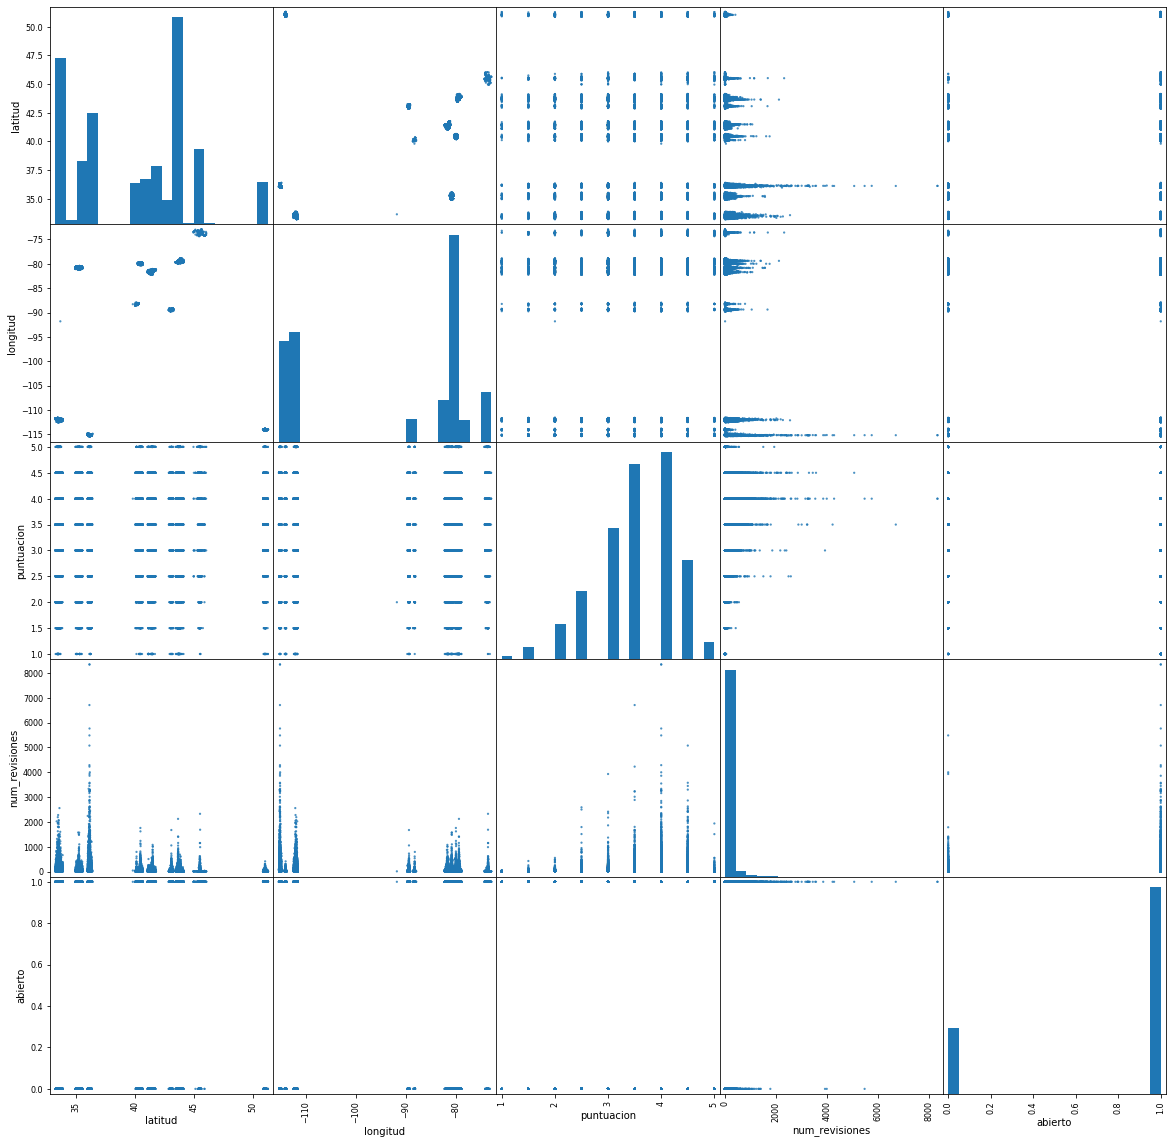

In [0]:
pd.plotting.scatter_matrix(dNegocios, figsize=(20, 20), marker='o',hist_kwds={'bins': 20}, s=5, alpha=.8)
plt.show()

Esta matriz nos presenta los siguientes datos: 

### Mapa

Primeramente observamos el mapa de los establecimientos que hemos seleccionado:

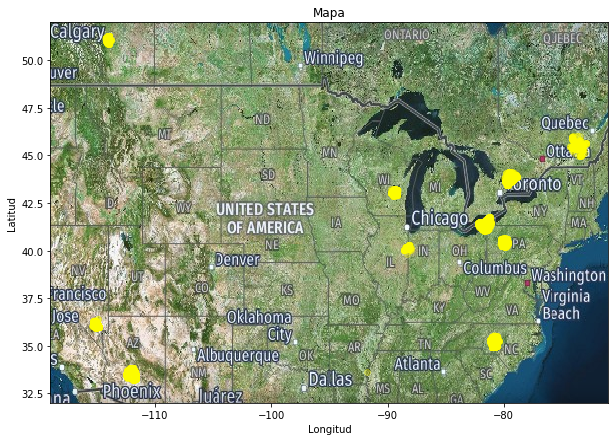

In [0]:
y = dNegocios['latitud']
x = dNegocios['longitud']
img = plt.imread("mapa.png")

plt.figure(figsize=(10,7))
plt.scatter(x, y, color='yellow', alpha=0.3)

plt.imshow(img, extent=[-119,-71,32,52], aspect='auto')

plt.title("Mapa")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

Observamos que los lugares donde más restaurantes hay son en ciudades de gran magnitud, como por ejemplo: Las Vegas, Phoenix, Toronto, Chicago, etc.

In [0]:
establecimientosPorCiudad = dNegocios["ciudad"].value_counts()
establecimientosPorCiudad = establecimientosPorCiudad.sort_values(ascending=False)

establecimientosPorCiudad.head(15)

Toronto        5633
Las Vegas      4609
Phoenix        2806
Montréal       2666
Calgary        2034
Charlotte      2014
Pittsburgh     1778
Scottsdale     1220
Mississauga    1047
Cleveland      1004
Madison         884
Mesa            837
Tempe           768
Henderson       648
Chandler        631
Name: ciudad, dtype: int64

El conjunto de datos a analizar pertenece a la región de Norteamérica (Estados Unidos y Canadá).

### Proporción establecimientos abiertos-cerrados

Como podemos ver, los establecimientos que están **abiertos** suelen llegar a tener mayor **número de revisiones**. También apreciamos que en la porción de datos que estamos manipulando hay mayor número de establecimientos **abiertos** que cerrados.  

### Número de revisiones

Seguidamente podemos advertir en la tabla **num_revisiones**-**puntuación**, que las puntuaciones tienden a seguir una distribución normal con asimetría negativa. En el gráfico presentado a continuación podemos ver de mejor forma esto. La mayor concentración de **número de revisiones** se encuentra entre 3'5 y 4'5. 

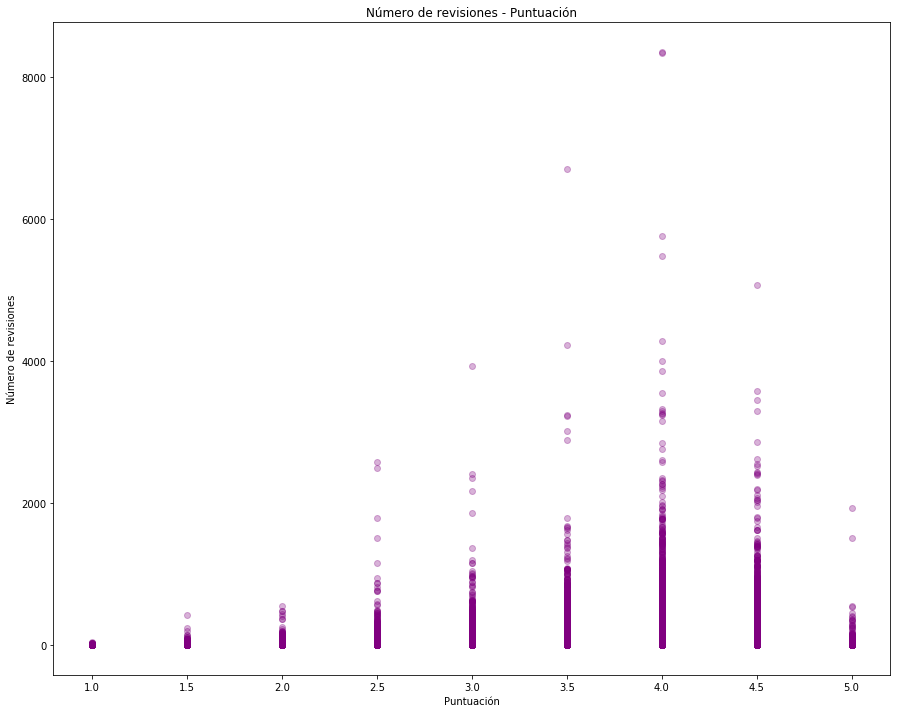

In [0]:
y = dNegocios['num_revisiones']
x = dNegocios['puntuacion']

plt.figure(figsize=(15,12))
plt.scatter(x, y, color='purple', alpha=0.3)
plt.title("Número de revisiones - Puntuación")
plt.xlabel("Puntuación")
plt.ylabel("Número de revisiones")
plt.show()

In [0]:
dNegocios['puntuacion'].describe()

count    42157.000000
mean         3.512204
std          0.757642
min          1.000000
25%          3.000000
50%          3.500000
75%          4.000000
max          5.000000
Name: puntuacion, dtype: float64

In [0]:
dNegocios['num_revisiones'].describe()

count    42157.000000
mean        86.875655
std        196.465558
min          3.000000
25%         12.000000
50%         32.000000
75%         86.000000
max       8348.000000
Name: num_revisiones, dtype: float64

In [0]:
dNegocios['categorias'].describe()

count     42157
unique       98
top       Pizza
freq       2948
Name: categorias, dtype: object

Como vemos, la categoría que más se repite es 'Pizza'. Aunque esta categoría, como veremos a continuación, no es la que recibe mayor número de revisiones.

In [0]:
freqCategorias = dNegocios["categorias"].value_counts()
freqCategoriasList = freqCategorias.sort_values(ascending=False)[:15]
print (freqCategoriasList)

Pizza                     2948
American (Traditional)    2824
Sandwiches                2446
Mexican                   2362
Fast Food                 2247
Chinese                   2071
Breakfast & Brunch        2032
Italian                   2013
American (New)            1939
Burgers                   1867
Cafes                     1629
Japanese                  1111
Seafood                    869
Sushi Bars                 866
Chicken Wings              781
Name: categorias, dtype: int64


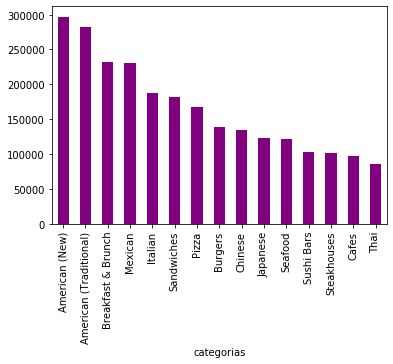

In [0]:
numRev = dNegocios.groupby('categorias')['num_revisiones'].sum()
numRevPlot = numRev.sort_values(ascending=False)[:15].plot.bar(stacked=True, color='purple')
plt.show()

A simple vista observamos que algunas de las categorías más frecuentes, o también llamado tipos de establecimientos más frecuentes, (*Pizza*, *Sandwiches* y *Fast Food*) no reciben el mayor número de revisiones. De hecho, *American (New)* y *Breakfast & Brunch* son categorías que reciben bastantes más revisiones en conjunto habiendo menor número de establecimientos.  
Si sacamos un coeficiente para ver qué negocios reciben una mayor cantidad de revisiones por establecimiento obtenemos lo siguiente:

#### Coeficiente de revisiones en tipos de cocina poco frecuentes (menos de 30 de frecuencia)

In [0]:
freqCategoriasMenos30 = freqCategorias[freqCategorias < 30]
coef_RevisionNegocioMinoritario = (numRev/freqCategoriasMenos30)
coef_RevisionNegocioMinoritarioTOP15 = coef_RevisionNegocioMinoritario.sort_values(ascending=False)[:15]

numEstablecimientosFreqMenos30 = pd.Series(freqCategoriasMenos30, index=coef_RevisionNegocioMinoritarioTOP15.index)

menos70 = pd.concat([coef_RevisionNegocioMinoritarioTOP15, numEstablecimientosFreqMenos30], axis=1)
menos70.columns = ['Media de revisiones por negocio', 'Número de negocios']
print (menos70)

                      Media de revisiones por negocio  Número de negocios
New Mexican Cuisine                        340.181818                  22
Scandinavian                               205.000000                   3
Mongolian                                  140.695652                  23
Malaysian                                  129.920000                  25
Argentine                                  124.636364                  22
Fondue                                     120.000000                  16
Belgian                                    110.647059                  17
Ukrainian                                   72.750000                   8
Russian                                     72.185185                  27
Indonesian                                  65.071429                  14
Czech                                       64.750000                   4
Hong Kong Style Cafe                        63.750000                   4
Himalayan/Nepalese                    

In [0]:
establecimientosMasRevisadosPorCategoria = dNegocios.sort_values(by='num_revisiones', ascending=False)
establecimientosMasRevisadosPorCategoria.set_index('categorias', inplace=True)

for categoria in coef_RevisionNegocioMinoritarioTOP15.index:
    establecimientoCategoriaTOP5 = establecimientosMasRevisadosPorCategoria.loc[categoria, : ][:5]
    print (establecimientoCategoriaTOP5[['num_revisiones', 'ciudad']])
    
    if categoria == coef_RevisionNegocioMinoritarioTOP15.index[0]:
        establecimientosMasRevisadosPorCategoriaTotalMENOS30 = establecimientoCategoriaTOP5
    else:
        establecimientosMasRevisadosPorCategoriaTotalMENOS30 = pd.concat([establecimientosMasRevisadosPorCategoriaTotalMENOS30, establecimientoCategoriaTOP5])

                     num_revisiones     ciudad
categorias                                    
New Mexican Cuisine            1967    Phoenix
New Mexican Cuisine            1203  Las Vegas
New Mexican Cuisine             893    Phoenix
New Mexican Cuisine             680    Phoenix
New Mexican Cuisine             468   Chandler
              num_revisiones     ciudad
categorias                             
Scandinavian             384  Las Vegas
Scandinavian             212  Charlotte
Scandinavian              19   Montréal
            num_revisiones      ciudad
categorias                            
Mongolian             1000   Las Vegas
Mongolian              428   Henderson
Mongolian              367       Tempe
Mongolian              258    Glendale
Mongolian              156  Pittsburgh
            num_revisiones         ciudad
categorias                               
Malaysian              603      Las Vegas
Malaysian              518        Phoenix
Malaysian              468  Ri

En el TOP5 de las 15 mejores categorías con menor frecuencia (categoría de restaurante más rara) vemos que la variedad de ciudades es muy grande en comparación al siguiente conjunto que veremos a continuación.

#### Coeficiente de revisiones en tipos de cocina frecuentes (más de 70 de frecuencia)

In [0]:
freqCategoriasMas70 = freqCategorias[freqCategorias > 70]
coef_RevisionNegocio = (numRev/freqCategoriasMas70)
coef_RevisionNegocioTOP15 = coef_RevisionNegocio.sort_values(ascending=False)[:15]

numEstablecimientosFreqMas70 = pd.Series(freqCategoriasMas70, index=coef_RevisionNegocioTOP15.index)

mas70 = pd.concat([coef_RevisionNegocioTOP15, numEstablecimientosFreqMas70], axis=1)
mas70.columns = ['Media de revisiones por negocio', 'Número de negocios']
print (mas70)

                    Media de revisiones por negocio  Número de negocios
Noodles                                  165.040268                 149
Cajun/Creole                             161.429907                 107
Steakhouses                              157.984448                 643
American (New)                           153.202166                1939
British                                  152.234568                  81
Seafood                                  140.185270                 869
Spanish                                  140.146667                  75
Hawaiian                                 136.266667                 120
Tapas/Small Plates                       128.205405                 185
French                                   123.583893                 447
Sushi Bars                               118.523095                 866
Thai                                     114.443700                 746
Breakfast & Brunch                       114.118602             

In [0]:
for categoria in coef_RevisionNegocioTOP15.index:
    establecimientoCategoriaTOP5 = establecimientosMasRevisadosPorCategoria.loc[categoria, : ][:25]
    print (establecimientoCategoriaTOP5[['num_revisiones', 'ciudad']][:5])
    
    if categoria == coef_RevisionNegocioTOP15.index[0]:
        establecimientosMasRevisadosPorCategoriaTotalMAS70 = establecimientoCategoriaTOP5
    else:
        establecimientosMasRevisadosPorCategoriaTotalMAS70 = pd.concat([establecimientosMasRevisadosPorCategoriaTotalMAS70, establecimientoCategoriaTOP5])

            num_revisiones     ciudad
categorias                           
Noodles               2604  Las Vegas
Noodles               1356  Las Vegas
Noodles               1052  Las Vegas
Noodles                910  Las Vegas
Noodles                900  Las Vegas
              num_revisiones     ciudad
categorias                             
Cajun/Creole            1706  Las Vegas
Cajun/Creole            1613  Las Vegas
Cajun/Creole            1501    Phoenix
Cajun/Creole             866    Phoenix
Cajun/Creole             720   Avondale
             num_revisiones     ciudad
categorias                            
Steakhouses            3547  Las Vegas
Steakhouses            2442  Las Vegas
Steakhouses            2417  Las Vegas
Steakhouses            2412  Las Vegas
Steakhouses            2269  Las Vegas
                num_revisiones     ciudad
categorias                               
American (New)            4227  Las Vegas
American (New)            3576  Las Vegas
American (New

En este TOP5 de las categorías con más frecuencia vemos que predomina 'Las Vegas' sobre todas las demás. Esto nos quiere decir que en Las Vegas suele haber todo tipo de negocios, pero sobretodo se promociona el negocio 'típico' o más común. Este suceso se complementa con la resolución de la Premisa 2, la cual explicamos en una parte más avanzada del documento.

#### Mapa de establecimientos
Haciendo un mapa de los restaurantes más revisados en función de su frecuencia:  
*(top 5 en frecuencia < 30 y top 25 en frecuencia > 70)*

Text(0, 0.5, 'Longitud')

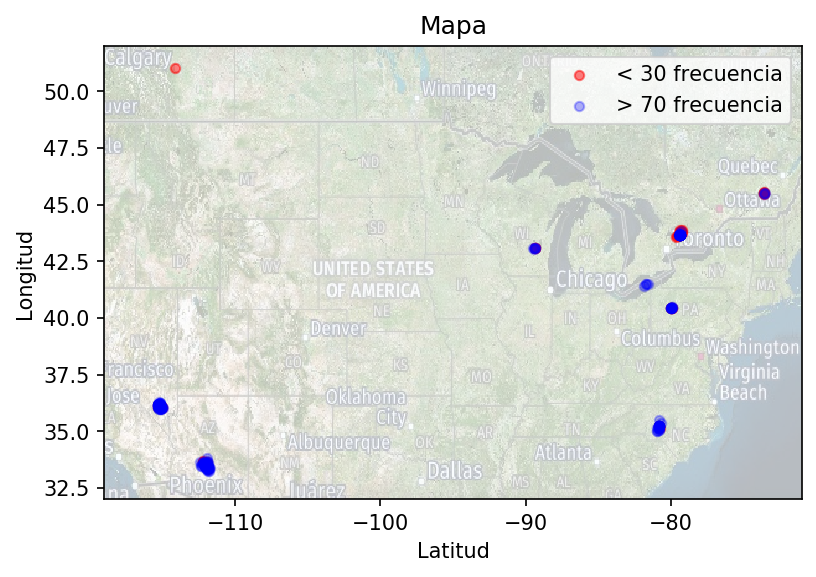

In [0]:
mas70plot = establecimientosMasRevisadosPorCategoriaTotalMAS70[['longitud', 'latitud']]
menos30plot = establecimientosMasRevisadosPorCategoriaTotalMENOS30[['longitud', 'latitud']]

ax = menos30plot.plot(kind='scatter', x='longitud', y='latitud', color='Red', alpha=0.5, label='< 30 frecuencia')
mas70plot.plot(kind='scatter', x='longitud', y='latitud', color='Blue', alpha=0.3, label='> 70 frecuencia', ax=ax).figure.set_dpi(150)
plt.imshow(img, extent=[-119,-71,32,52], aspect='auto', alpha=0.3)
plt.title("Mapa")
plt.xlabel("Latitud")
plt.ylabel("Longitud")

El top de restaurantes más revisados de las categorías más comunes (>70 frecuencia) se encuentran principalmente en *Las Vegas* (punto azul), mientras que para el top de restaurante de las categorías menos comunes (<30 frecuencia) se distribuyen de una forma más repartida, pero se centra principalmente en *Phoenix*, *Las Vegas*, *Pittsburgh* y *Toronto*.

##### Zona Las Vegas

In [0]:
categoriaPorZona = dNegocios[dNegocios.ciudad == 'Las Vegas']
categoriaPorZona = categoriaPorZona.groupby('categorias')['puntuacion'].mean()
categoriaPorZona = categoriaPorZona.sort_values(ascending=False)

categoriaPorZona.head(15)

categorias
Mongolian              4.666667
Argentine              4.500000
Moroccan               4.500000
Fondue                 4.333333
Laotian                4.250000
Live/Raw Food          4.250000
Russian                4.166667
Middle Eastern         4.130435
New Mexican Cuisine    4.125000
Gluten-Free            4.100000
Caribbean              4.066667
Taiwanese              4.045455
Soul Food              4.041667
Korean                 4.027778
Persian/Iranian        4.000000
Name: puntuacion, dtype: float64

##### Zona Phoenix

In [0]:
categoriaPorZona = dNegocios[dNegocios.ciudad == 'Phoenix']
categoriaPorZona = categoriaPorZona.groupby('categorias')['puntuacion'].mean()
categoriaPorZona = categoriaPorZona.sort_values(ascending=False)

categoriaPorZona.head(15)

categorias
Modern European    4.500000
Moroccan           4.500000
Creperies          4.375000
Ethiopian          4.250000
Tapas Bars         4.166667
Cuban              4.166667
Peruvian           4.166667
Hot Dogs           4.076923
Cafes              4.065217
Caribbean          4.038462
Mediterranean      4.022222
Polish             4.000000
Malaysian          4.000000
Laotian            4.000000
Afghan             4.000000
Name: puntuacion, dtype: float64

##### Zona Toronto

In [0]:
categoriaPorZona = dNegocios[dNegocios.ciudad == 'Toronto']
categoriaPorZona = categoriaPorZona.groupby('categorias')['puntuacion'].mean()
categoriaPorZona = categoriaPorZona.sort_values(ascending=False)

categoriaPorZona.head(15)

categorias
Arabian                 4.666667
Laotian                 4.500000
Ukrainian               4.250000
Himalayan/Nepalese      4.214286
Bangladeshi             4.166667
Russian                 4.100000
Ethiopian               4.100000
Latin American          4.054054
Hong Kong Style Cafe    4.000000
Moroccan                4.000000
Belgian                 3.916667
Persian/Iranian         3.900000
Modern European         3.891304
Turkish                 3.888889
African                 3.884615
Name: puntuacion, dtype: float64

Vemos que en Phoenix y Las Vegas las categorías mejor puntuadas tienen mejor rango de puntuación que en Toronto. No analizaremos más este tipo de datos debido a la poca cantidad de datos representados en esta parte.

#### Negocios con más revisiones
##### Conjunto total

In [0]:
establecimientosMasRevisadosPorCategoria.describe()

,latitud,longitud,puntuacion,num_revisiones,abierto
count,42157.000000,42157.000000,42157.000000,42157.000000,42157.000000
mean,40.031862,-92.560813,3.512204,86.875655,0.757359
std,4.997153,16.544864,0.757642,196.465558,0.428685
min,33.215398,-115.452994,1.000000,3.000000,0.000000
25%,35.236870,-112.065216,3.000000,12.000000,1.000000
50%,41.156147,-81.439296,3.500000,32.000000,1.000000
75%,43.689423,-79.438867,4.000000,86.000000,1.000000
max,51.294184,-72.947516,5.000000,8348.000000,1.000000


Los negocios mejor puntuados en general son los siguientes:

In [0]:
establecimientosMejorPuntuados = dNegocios.sort_values(by=['puntuacion','num_revisiones'], ascending=False)
establecimientosMejorPuntuados.set_index('nombre', inplace=True)
establecimientosMejorPuntuadosTOP = establecimientosMejorPuntuados[establecimientosMejorPuntuados.num_revisiones >= 1000]

establecimientosMejorPuntuados[['puntuacion', 'num_revisiones', 'categorias', 'ciudad']].head(15)

,puntuacion,num_revisiones,categorias,ciudad
nombre,,,,
Little Miss BBQ,5.0,1936,Barbeque,Phoenix
Brew Tea Bar,5.0,1506,Cafes,Las Vegas
Worth Takeaway,5.0,552,American (Traditional),Mesa
Poke Express,5.0,543,Hawaiian,North Las Vegas
HUMMUS,5.0,459,Mediterranean,Henderson
Kodo Sushi Sake,5.0,414,Sushi Bars,Scottsdale
Not Your Typical Deli,5.0,402,Cuban,Gilbert
Zenaida's Cafe,5.0,374,Cafes,Las Vegas
J Karaoke Bar,5.0,363,Korean,Las Vegas


Los negocios mejor puntuados que al menos tengan 1000 revisiones son los siguientes:

In [0]:
establecimientosMejorPuntuadosTOP[['puntuacion', 'num_revisiones', 'categorias', 'ciudad']].head(15)

,puntuacion,num_revisiones,categorias,ciudad
nombre,,,,
Little Miss BBQ,5.0,1936,Barbeque,Phoenix
Brew Tea Bar,5.0,1506,Cafes,Las Vegas
Earl of Sandwich,4.5,5075,Salad,Las Vegas
Yardbird Southern Table & Bar,4.5,3576,American (New),Las Vegas
Gangnam Asian BBQ Dining,4.5,3449,Barbeque,Las Vegas
Egg & I,4.5,3300,Breakfast & Brunch,Las Vegas
Rollin Smoke Barbeque,4.5,2862,Burgers,Las Vegas
El Dorado Cantina,4.5,2623,Mexican,Las Vegas
Bobby Q,4.5,2556,American (New),Phoenix


Sesgando los datos poniendo como condición que tengan más de 1000 revisiones, nos percatamos que ciudades como *Las Vegas* y *Phoenix* (ciudades muy muy turísticas) tienen el monopolio del top de restaurantes.

##### Negocios con más revisiones ( > 70 de frecuencia)

In [0]:
establecimientosMasRevisadosPorCategoriaTotalMAS70.describe()

,latitud,longitud,puntuacion,num_revisiones,abierto
count,375.000000,375.000000,375.000000,375.000000,375.000000
mean,36.521452,-106.720501,3.982667,940.685333,0.906667
std,2.961680,14.252769,0.446727,892.345636,0.291288
min,33.232546,-115.334471,1.500000,108.000000,0.000000
25%,35.209787,-115.175391,4.000000,394.500000,1.000000
50%,36.109946,-115.138977,4.000000,720.000000,1.000000
75%,36.143518,-111.881995,4.500000,1150.000000,1.000000
max,45.520394,-73.553067,5.000000,8348.000000,1.000000


Los 25 establecimientos más revisados por categoría de las categorías más revisadas (*frecuencia > 70*) reciben más **puntuación** de media que la media del conjunto total (*3.98 vs 3.51*).   
--> ***PREMISA 1***: Esto nos podría decir que un establecimiento que recibe muchas opiniones es mejor que la media y la gente acude más a él por la difusión o calidad del mismo. La mayoría de estos siguen **abiertos** (*90%*).

In [0]:
establecimientosMasRevisadosPorCategoriaTotalMAS70 = establecimientosMasRevisadosPorCategoriaTotalMAS70.sort_values(by='num_revisiones', ascending=False)
establecimientosMasRevisadosPorCategoriaTotalMAS70[['nombre', 'num_revisiones', 'puntuacion', 'ciudad', 'abierto']].head(15)

,nombre,num_revisiones,puntuacion,ciudad,abierto
categorias,,,,,
French,Mon Ami Gabi,8348,4.0,Las Vegas,1
Breakfast & Brunch,Wicked Spoon,6708,3.5,Las Vegas,1
Breakfast & Brunch,Hash House A Go Go,5763,4.0,Las Vegas,1
American (New),The Buffet at Bellagio,4227,3.5,Las Vegas,1
Thai,Lotus of Siam,3998,4.0,Las Vegas,0
French,Bouchon,3859,4.0,Las Vegas,1
American (New),Yardbird Southern Table & Bar,3576,4.5,Las Vegas,1
Steakhouses,Gordon Ramsay Steak,3547,4.0,Las Vegas,1
American (New),Bachi Burger,3333,4.0,Las Vegas,1


Podemos ver que todos estos negocios tan multiplemente revisados se encuentran en ***Las Vegas***, aunque el conjunto del dataset dispone de establecimientos en muchas más zonas.  

--> ***PREMISA 2***: Un usuario no suele (o no puede en función de la plataforma) escribir 2 opiniones sobre un mismo establecimiento, por lo que podemos pensar que un **mayor tráfico de personas diferentes** hace que un negocio pueda llegar a tener un **mayor número de revisiones**.  
--> ***PREMISA 2 (respuesta)***: *Las Vegas* es la **séptima ciudad más visitada de EEUU** con 43,3 millones de turistas en 2018 y en la que se albergan 17 de los 20 hoteles más importantes del país. El tráfico de personas al que se expone esta zona hace que un mayor número **diferente** de turistas pasen por sus establecimientos. Si nos fijamos en los siguientes datos:

In [0]:
establecimientosMasRevisadosPorCategoria[['nombre','direccion','abierto']].head(10)

,nombre,direccion,abierto
categorias,,,
French,Mon Ami Gabi,3655 Las Vegas Blvd S,1
Sandwiches,Bacchanal Buffet,3570 S Las Vegas Blvd,1
Breakfast & Brunch,Wicked Spoon,3708 Las Vegas Blvd S,1
Breakfast & Brunch,Hash House A Go Go,3535 Las Vegas Blvd,1
Burgers,Gordon Ramsay BurGR,3667 Las Vegas Blvd S,0
Salad,Earl of Sandwich,3667 Las Vegas Blvd S,1
Pizza,Secret Pizza,"3708 Las Vegas Blvd S, Level 3, The Boulevard ...",1
American (New),The Buffet at Bellagio,3600 S Las Vegas Blvd,1
Thai,Lotus of Siam,953 E Sahara Ave,0


La premisa 2 planteada en el párrafo anterior se puede comprobar observando en el **conjunto general** que dos de los restaurantes con mayor número de revisiones: *Gordon Ramsay BurGR* (cerrado) y *Earl of Sandwich* (abierto); están en la **misma localización**. El que el motivo de su gran número de revisiones no es la antiguedad del establecimiento, si no su ubicación.

##### Negocios con más revisiones ( < 30 de frecuencia)

In [0]:
establecimientosMasRevisadosPorCategoriaTotalMENOS30.describe()

,latitud,longitud,puntuacion,num_revisiones,abierto
count,71.000000,71.000000,71.000000,71.000000,71.000000
mean,39.728916,-93.558193,3.880282,289.211268,0.816901
std,4.636299,17.118506,0.544222,349.911863,0.389500
min,33.313653,-115.300890,2.000000,6.000000,0.000000
25%,36.036017,-112.195270,3.500000,95.000000,1.000000
50%,40.449043,-80.740587,4.000000,187.000000,1.000000
75%,43.656513,-79.398333,4.250000,366.500000,1.000000
max,51.038077,-73.576272,5.000000,1967.000000,1.000000


Los 5 establecimientos más revisados por categoría de las categorías más revisadas (*frecuencia < 30*) reciben más **puntuación** de media que la media del conjunto total (*3.88 vs 3.51*).  
--> ***PREMISA 1*** *(formulada en el anterior apartado): Esto nos podría decir que un establecimiento que recibe muchas opiniones es mejor que la media y la gente acude más a él por la difusión o calidad del mismo.*  
--> ***PREMISA 1(respuesta)***: Los establecimientos más revisados (en función de la cantidad de restaurantes que existan por categoría de cocina) consiguen una **media mayor** de **puntuación** que la media de todo el conjunto (*3.88 y 3.98 vs 3.51*). Esto confirma que los establecimientos más visitados consiguen mayor puntuación por su calidad y difusión.

In [0]:
establecimientosMasRevisadosPorCategoriaTotalMENOS30 = establecimientosMasRevisadosPorCategoriaTotalMENOS30.sort_values(by='num_revisiones', ascending=False)
establecimientosMasRevisadosPorCategoriaTotalMENOS30[['nombre', 'num_revisiones', 'puntuacion', 'ciudad', 'abierto']].head(15)

,nombre,num_revisiones,puntuacion,ciudad,abierto
categorias,,,,,
New Mexican Cuisine,La Santisima,1967,4.0,Phoenix,1
Argentine,Gaucho Parrilla Argentina,1618,4.5,Pittsburgh,1
New Mexican Cuisine,DW Bistro,1203,4.5,Las Vegas,1
Mongolian,Chubby Cattle,1000,4.5,Las Vegas,1
New Mexican Cuisine,Dick's Hideaway,893,4.5,Phoenix,1
New Mexican Cuisine,Rokerij,680,4.0,Phoenix,1
Russian,Red Square Restaurant & Vodka Lounge,637,4.0,Las Vegas,1
Malaysian,Satay Thai Bistro & Bar,603,4.0,Las Vegas,1
Belgian,Point Brugge Café,549,4.5,Pittsburgh,1


En este conjunto las ciudades en las que se encuentran los restaurantes más revisados son más variadas que en el anterior. Predominan *Phoenix* y *Las Vegas* sobretodo.

#### Matriz de correlación

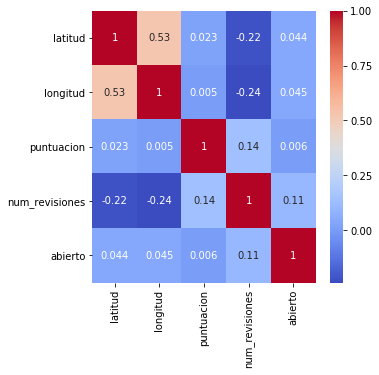

In [0]:
correlation_matrix = dNegocios.corr().round(3)
plt.subplots(figsize=(5,5))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')

La matriz de correlación no muestra ninguna información relevante.